#### Amazon Shopping Reviews [Daily Updated]. Amazon Reviews from Google Play Store 
##### The reviews and ratings of Amazon Shopping App by users are primary component of this dataset. It is updated daily . It also includes information on the relevancy of reviews and the date of posting the review,etc.
##### Remote source:https://www.kaggle.com/code/ashishkumarak/amazon-google-play-reviews-scraping-daily-update.
##### It contains the username , the reviews, the ratings, the likes given to the reviews and the app version on which the review was given

In [1]:
import requests
import zipfile
import io
import pandas as pd

# URL to the raw ZIP file on GitHub
url = "https://github.com/MedvedkinAP/amazon_reviews/raw/main/amazon_reviews.csv.zip"

# Downloading the file by making an HTTP GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the ZIP file as a file-like object
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        # Extract the CSV file into a pandas DataFrame
        with zip_file.open('amazon_reviews.csv') as csv_file:
            df = pd.read_csv(csv_file)
            print("File successfully downloaded and loaded into DataFrame")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Display the first few rows of the DataFrame
print(df.head())


File successfully downloaded and loaded into DataFrame
                               reviewId           userName  \
0  0899edc2-6dd0-4e40-8471-6836dfc52b00  Quintasha Jackson   
1  dc8496a1-bb8f-40cd-9ac7-5dc2ba1a6703   Tiffany Boisvert   
2  3492103d-2761-4385-b764-d7d2351d6996       Kim Hilliker   
3  b49415d0-0f8e-48c9-bf29-718be6cc8b67   Joshua Dickenson   
4  bee4d6f7-dba0-4895-946e-80432f769eb5   Mohammed Abdalla   

                                             content  score  thumbsUpCount  \
0                                   I love Amazon ❤️      5              0   
1                            difficult to figure out      1              0   
2  wonderful and fast, efficient a d great custom...      5              0   
3  "Your orders" screen keeps flashing, can't see...      1              0   
4                                                💙💙💙      5              0   

  reviewCreatedVersion                   at  appVersion  
0           28.9.2.100  2024-05-14 23:17:13  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr



## Analysis of Amazon Shopping App Reviews

In [3]:
# df = pd.read_csv(r"C:\Наша папка\Андрей\Work\Project_Amazon_05_2024\amazon_reviews.csv\amazon_reviews.csv")

In [4]:
df.dtypes

reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object

In [5]:
df.shape

(50650, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50650 entries, 0 to 50649
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50650 non-null  object
 1   userName              50645 non-null  object
 2   content               50650 non-null  object
 3   score                 50650 non-null  int64 
 4   thumbsUpCount         50650 non-null  int64 
 5   reviewCreatedVersion  45784 non-null  object
 6   at                    50650 non-null  object
 7   appVersion            45784 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [7]:
# Check the number of missing values in 'reviewCreatedVersion' and 'appVersion' fields
missing_reviewCreatedVersion = df['reviewCreatedVersion'].isna().sum()
missing_appVersion = df['appVersion'].isna().sum()

print(f"Conclusion: {missing_reviewCreatedVersion} values are missing in the reviewCreatedVersion field.")
print(f"Conclusion: {missing_appVersion} values are missing in the appVersion field.")


Conclusion: 4866 values are missing in the reviewCreatedVersion field.
Conclusion: 4866 values are missing in the appVersion field.


In [8]:
df.describe()

,score,thumbsUpCount
count,50650.000000,50650.000000
mean,2.416742,13.642705
std,1.640119,85.622604
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,4.000000,3.000000
max,5.000000,5660.000000


In [9]:
df['appVersion'].value_counts()

appVersion
28.7.0.100     1526
22.6.0.100     1230
26.23.4.100    1172
26.21.0.100    1121
22.5.0.100     1060
               ... 
5.9.0.100         1
5.6.0.100         1
5.3.1.100         1
8.6.0.100         1
12.0.0.100        1
Name: count, Length: 220, dtype: int64

#### Checking the correspondence between columns 'appVersion' and 'reviewCreatedVersion'

In [10]:
df['match_vers']=np.where(df['appVersion']==df['reviewCreatedVersion'], 'match', 'not')

In [11]:
df['match_vers'].value_counts()

match_vers
match    45784
not       4866
Name: count, dtype: int64

In [12]:
df_not = df[df['match_vers']=='not']

In [13]:
df_group = df_not.groupby('at').size()

In [14]:
df_group.value_counts()

1    4866
Name: count, dtype: int64

Conclusion: Users did not fill in the version fields on different dates

### Analyzing the dataset by dates

In [15]:
# Converting to datetime object
df['date_at'] = pd.to_datetime(df['at'], format='%Y-%m-%d %H:%M:%S').dt.date

#### Analyzing period of dataset

In [16]:
df_min_date = df['date_at'].min()
df_max_date = df['date_at'].max()
df_period = df_max_date - df_min_date
df_total_period = df_period.days
print(f'Period of datesets from {df_min_date} to {df_max_date}, total period {df_total_period} days')

Period of datesets from 2018-09-12 to 2024-05-14, total period 2071 days


#### Analysis of the distribution of the number of contents by year

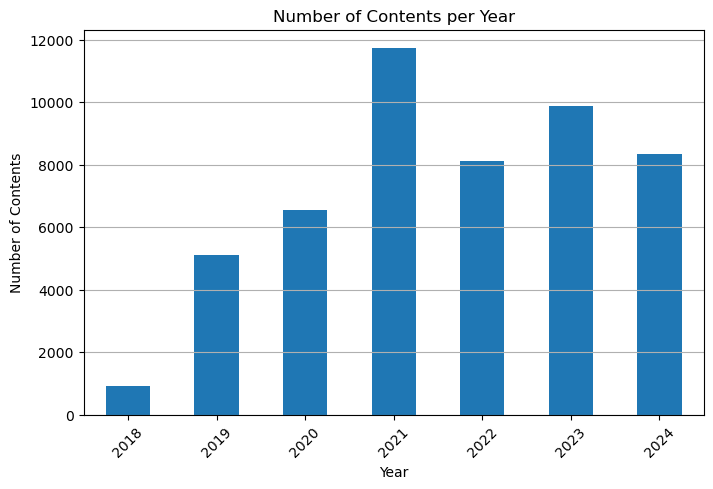

In [17]:
# Convert the date column to datetime
df['date_at'] = pd.to_datetime(df['date_at'])

# Extract the year from the date
df['year'] = df['date_at'].dt.year

# Group by the year and count the number of rows
yearly_counts = df['year'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(8, 5))
yearly_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Contents')
plt.title('Number of Contents per Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


##### Conclusion: The number of responses (content) saw a significant increase in 2021, likely driven by COVID-19, which boosted service usage activity, followed by a subsequent stabilization of the metric

### Analysis of score distribution

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


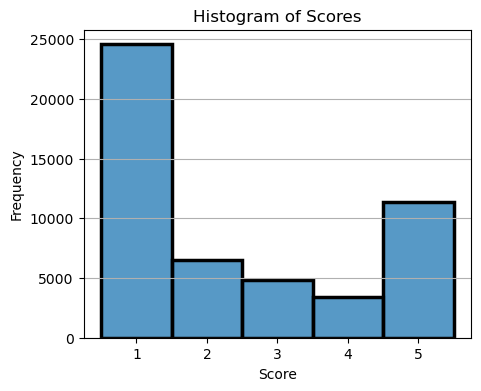

In [18]:
# Plotting the histogram Frequency of Score
plt.figure(figsize=(5, 4))
sns.histplot(df['score'], bins=range(1, 7), kde=False, edgecolor='black', linewidth=2.5)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.xticks(np.arange(1.5, 6.5, 1), range(1, 6))  
plt.grid(axis='y')
plt.show()

##### The chart shows that users with a score of 1 are the most active, reflecting a general tendency to convey dissatisfaction with the service to the company. At the same time, a second significant group with a high service score stands out

### Analysis of the count of reviews and mean score by year

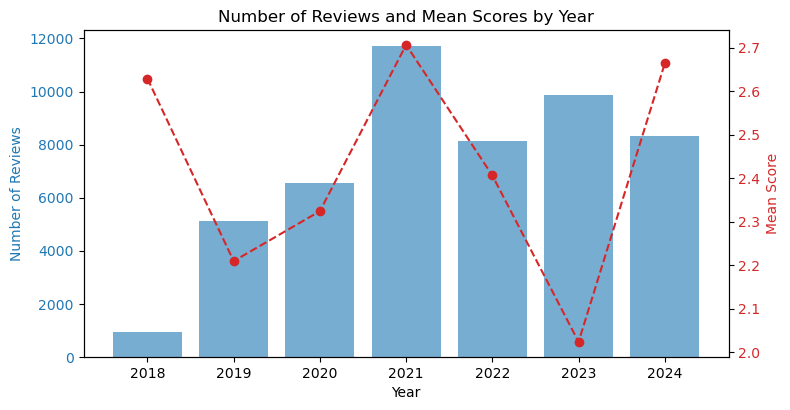

In [19]:
# Extract the year from 'date_at'
df['year'] = df['date_at'].dt.year

# Group by year and calculate the count of reviews and mean score
yearly_stats = df.groupby('year').agg(
    num_reviews=('score', 'size'),   # Number of reviews
    mean_score=('score', 'mean')     # Mean score
).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar plot for the number of reviews
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Reviews', color=color)
ax1.bar(yearly_stats['year'], yearly_stats['num_reviews'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for the mean score
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mean Score', color=color)
ax2.plot(yearly_stats['year'], yearly_stats['mean_score'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
fig.tight_layout()  
plt.title('Number of Reviews and Mean Scores by Year')
plt.show()


##### Conclusion: The negative and insignificant correlation by year indicates that the number of reviews is not related to the average rating on an annual level.

### Analysis  of the score distribution by year

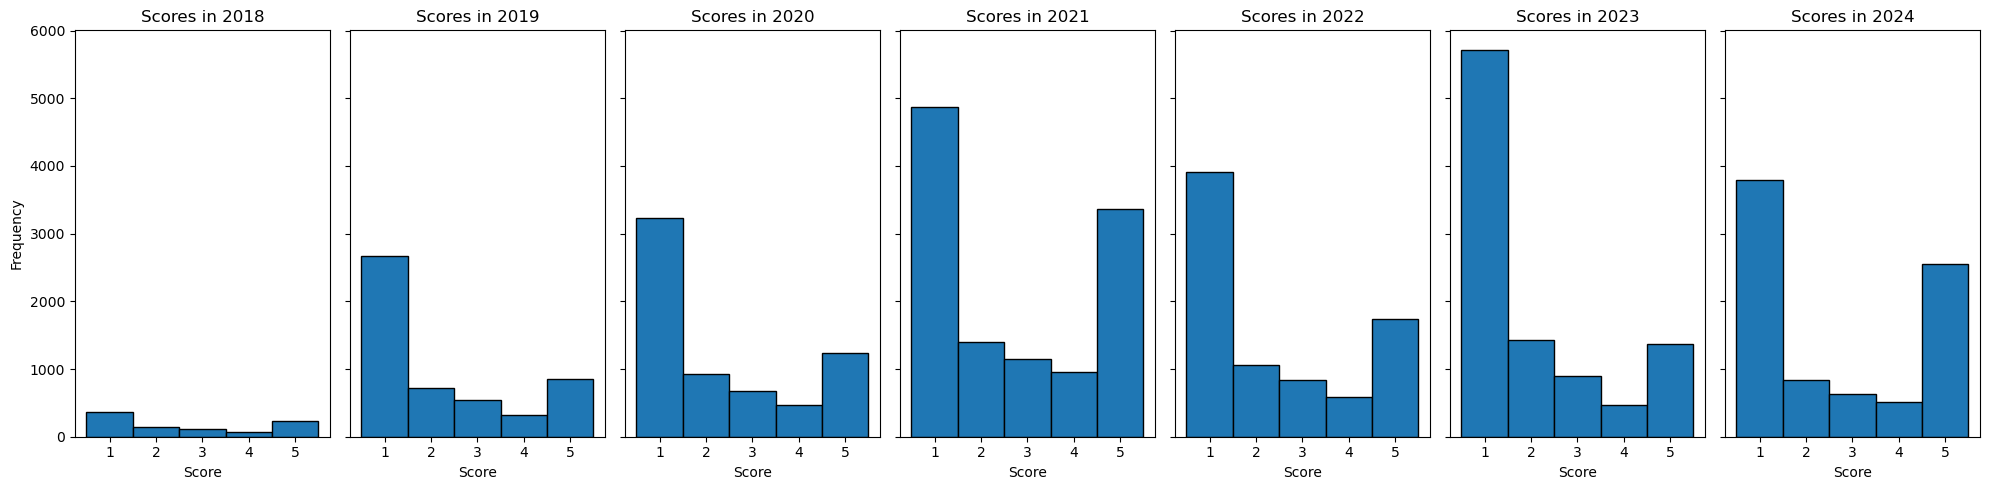

In [20]:
# Get the unique years in the DataFrame and sort them
years = sorted(df['date_at'].dt.year.unique())

# Create a dictionary of DataFrames filtered by year
dfs = {year: df[df['date_at'].dt.year == year] for year in years}

# Plotting the histograms side by side
fig, axs = plt.subplots(1, len(years), figsize=(20, 5), sharey=True)

for ax, year in zip(axs, years):
    data = dfs[year]
    ax.hist(data['score'], bins=range(1, 7), edgecolor='black', align='left')
    ax.set_title(f'Scores in {year}')
    ax.set_xlabel('Score')
    ax.set_xticks(range(1, 6))

axs[0].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()


##### Conclusion: The most frequently given app rating is 1, with the second most common rating being 5. The metrics for 2023 show the highest number of reviews and the worst rating distribution. However, it is worth noting a positive trend in the ratings over the period of 2024.

### Analysis of the correlation between counts of contents and mean score by month

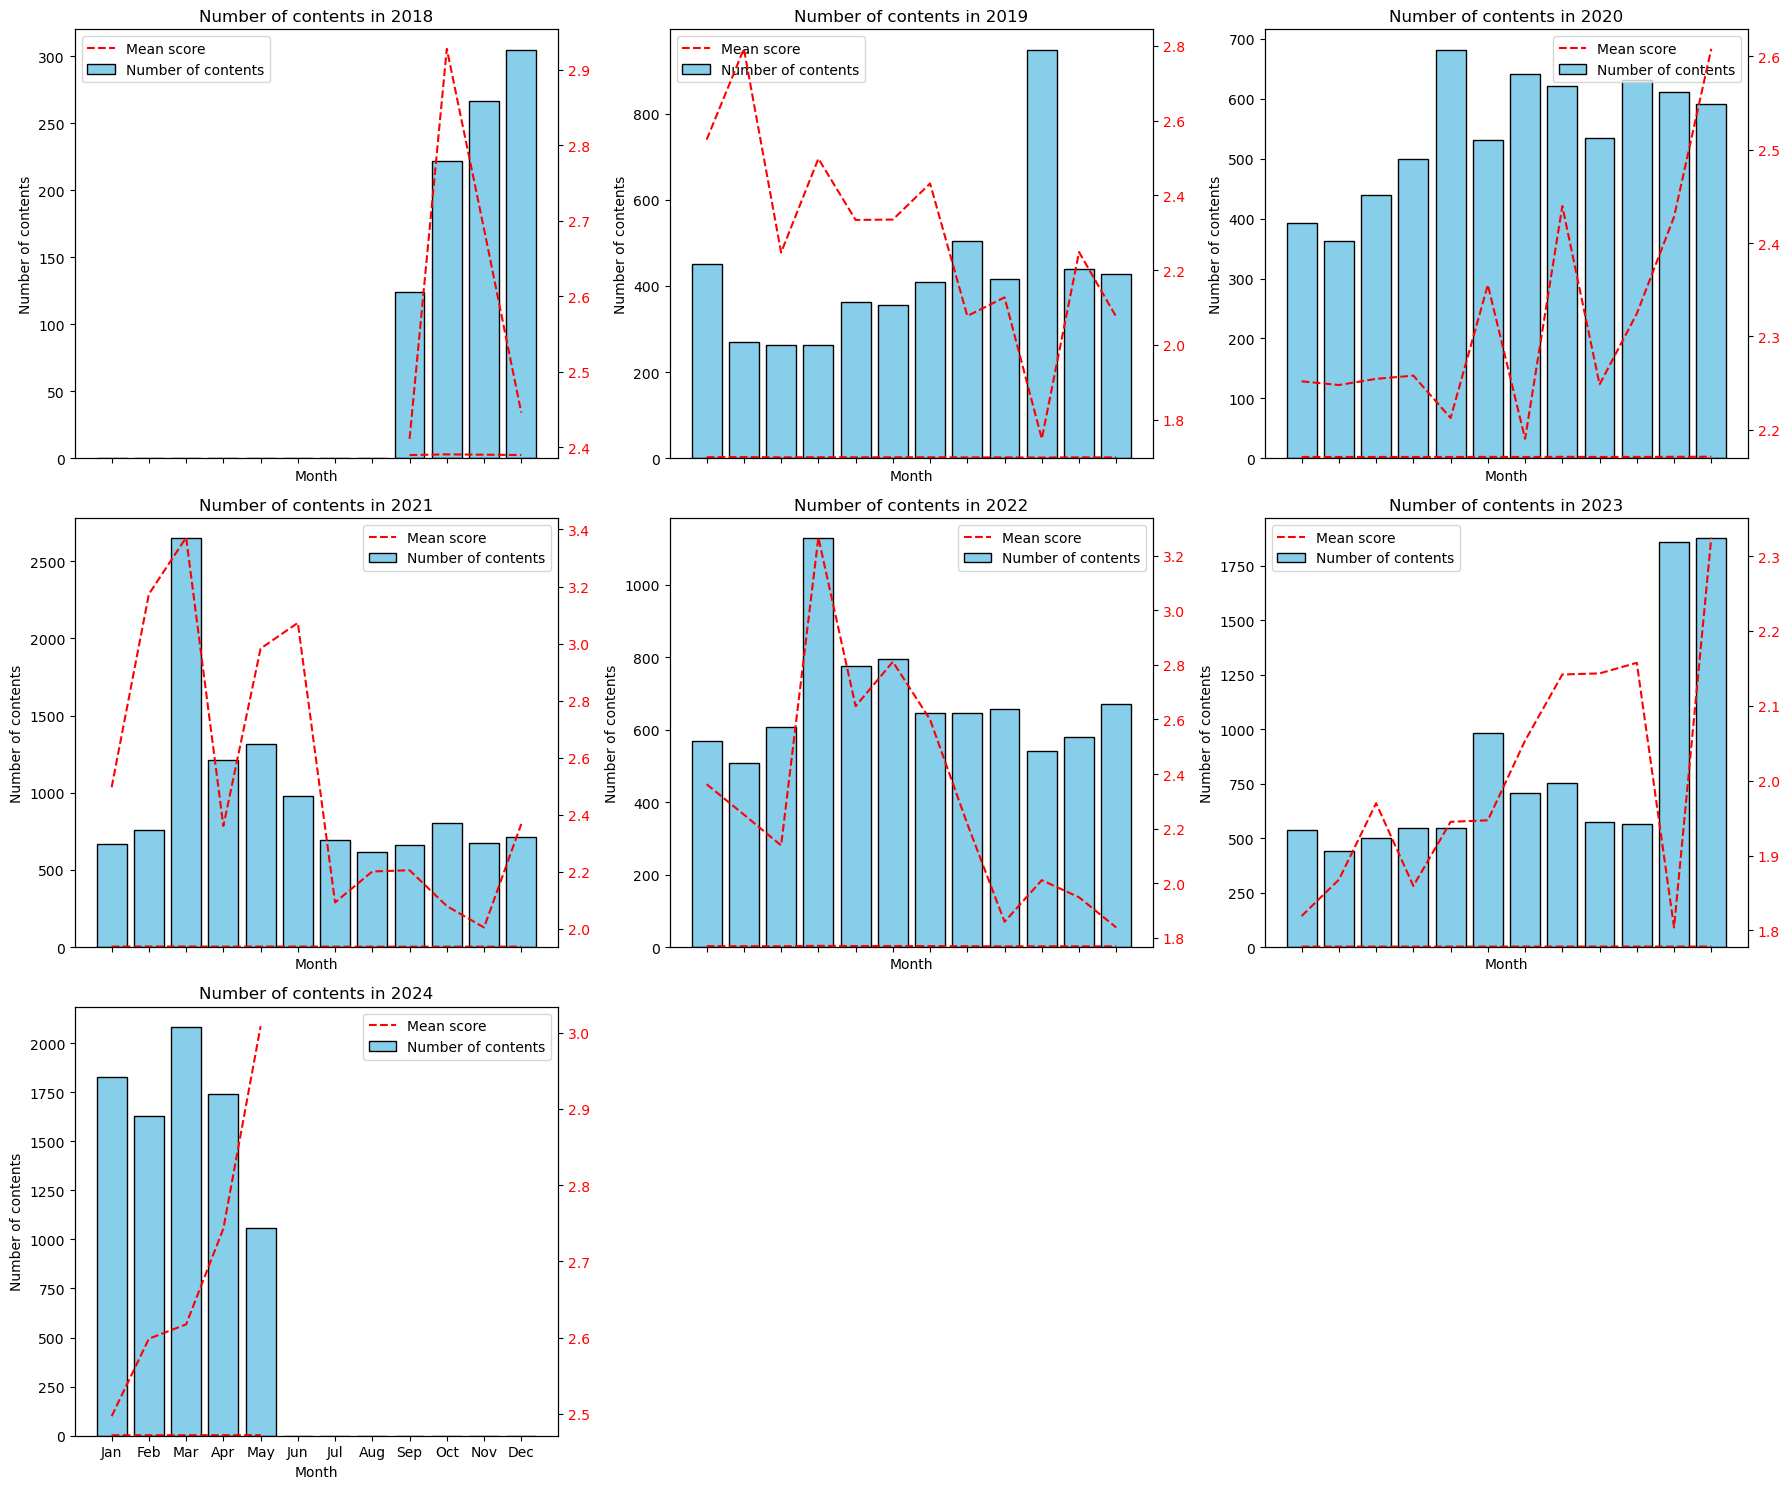

In [21]:
# Adding 'year' and 'month' columns to the DataFrame
df['year'] = df['date_at'].dt.year
df['month'] = df['date_at'].dt.month

# Getting unique years
years = sorted(df['year'].unique())

# Creating a pivot table with counts of contents for each month of each year
pivot_table = df.pivot_table(index='month', columns='year', values='score', aggfunc='count', fill_value=0)

# Setting up the size of the plots
num_years = len(years)
num_cols = 3
num_rows = (num_years + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows), sharex=True)

# Flattening axs into a 1D array for easy iteration
axs = axs.flatten()

for ax, year in zip(axs, years):
    data = pivot_table[year]
    ax.bar(data.index, data.values, color='skyblue', edgecolor='black', label='Number of contents')
    
    # Calculate mean score separately for each month
    mean_scores = df[df['year'] == year].groupby('month')['score'].mean()
    
    # Plot mean score for each month as a horizontal line
    ax.plot(mean_scores.index, mean_scores.values, color='red', linestyle='--', label='Mean score')
    
    ax.set_title(f'Number of contents in {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of contents')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.legend()

    # Add a secondary y-axis for mean score
    ax2 = ax.twinx()
    # ax2.set_ylabel('Mean score', color='red')
    ax2.plot(mean_scores.index, mean_scores.values, color='red', linestyle='--')
    ax2.tick_params(axis='y', labelcolor='red')

# Removing empty subplots if any
for i in range(len(years), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


##### Conclusion: The graphs show that there is no seasonality in the number of contents

In [22]:
# Calculate the correlation coefficient and the p-value

# Convert the date to the year-month format
df['year_month'] = df['date_at'].dt.to_period('M')

# Group by year_month and calculate the number of reviews and mean score
monthly_data = df.groupby('year_month').agg({'content': 'count', 'score': 'mean'}).rename(columns={'content': 'num_contents', 'score': 'mean_score'}).reset_index()

# Calculate the Pearson correlation coefficient and the p-value
correlation, p_value = pearsonr(monthly_data['num_contents'], monthly_data['mean_score'])

print(f'Correlation: {correlation}')
print(f'P-value: {p_value}')


Correlation: 0.3187065941460374
P-value: 0.00760779800578093


##### Conclusion: Weak Correlation by Month. The positive and significant correlation by month suggests that there might be some dependence between the number of reviews and mean score in the short term. However, this dependence is not strong.

### Analysis of App Versions

In [23]:
# Calculate count of appVersions
count_Versions = df['appVersion'].nunique()
print(f'Count of versions is {count_Versions}')

Count of versions is 220


In [24]:
# Analysis count of contents, mean score and date by appVersion
# earliest_date - the earliest review date of the version

df_score_version = df.groupby('appVersion').agg({'score': 'mean', 'appVersion': 'size', 'date_at': 'min'}).rename(columns = {'appVersion': 'cnt_version', 'date_at':'earliest_date'}).reset_index()
df_score_version = df_score_version.sort_values('cnt_version', ascending=False)
df_score_version.head(10)

,appVersion,score,cnt_version,earliest_date
186,28.7.0.100,2.905636,1526,2024-04-02
118,22.6.0.100,3.047154,1230,2021-03-17
171,26.23.4.100,2.468430,1172,2023-12-21
167,26.21.0.100,1.810883,1121,2023-10-25
117,22.5.0.100,3.800000,1060,2021-03-02
119,22.7.0.100,2.426945,1054,2021-03-31
182,28.4.0.100,2.786920,948,2024-02-21
184,28.5.2.100,2.565116,860,2024-03-08
60,18.21.2.100,2.172289,830,2019-11-11
168,26.22.0.100,2.073082,821,2023-11-16


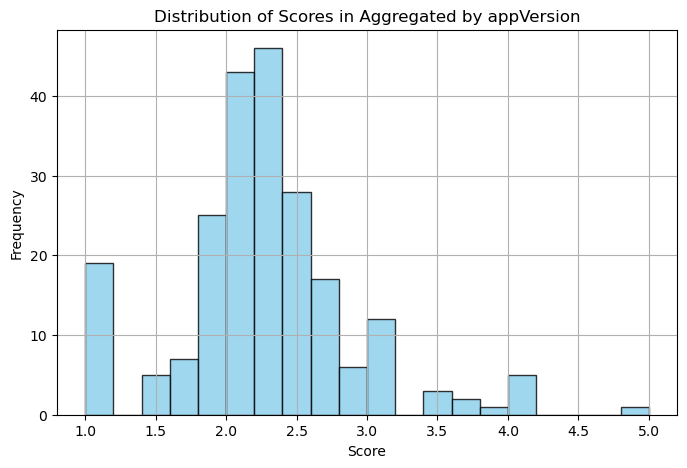

In [25]:
# Creating a histogram of the distribution of scores aggregated by appVersion

# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.hist(df_score_version['score'], bins=20, color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of Scores in Aggregated by appVersion')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


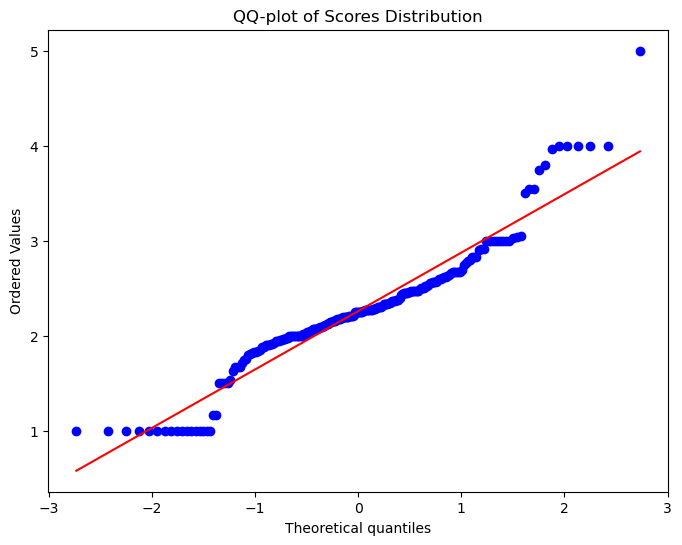

In [26]:
# Checking the distribution of scores against a normal distribution

# Generating normally distributed random numbers
normal_values = np.random.normal(loc=df_score_version['score'].mean(), scale=df_score_version['score'].std(), size=len(df_score_version))

# Sorting values
normal_values.sort()

# Creating a QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(df_score_version['score'], dist="norm", plot=plt)
plt.title('QQ-plot of Scores Distribution')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()


##### Conclusion: The distribution of the mean scores of the versions is close to a normal distribution with deviations in the extreme values

#### Let's analyze the distribution of scores for the 5 versions with the earliest date in 2024 that have the highest number of comments

In [27]:
# Filter by 2024 year for analysis

df_score_version_2024 = df_score_version[df_score_version['earliest_date'].dt.year == 2024]
df_score_version_2024.head(5)

,appVersion,score,cnt_version,earliest_date
186,28.7.0.100,2.905636,1526,2024-04-02
182,28.4.0.100,2.786920,948,2024-02-21
184,28.5.2.100,2.565116,860,2024-03-08
179,28.1.0.100,2.671942,695,2024-01-09
180,28.2.2.100,2.521676,692,2024-01-25


In [28]:
# Sort the DataFrame by 'cnt_verion' in descending order and select the top 5 rows
top_5_versions = df_score_version_2024.nlargest(5, 'cnt_version')

# Create a list of 'appVersion' values from these top 5 rows
top_5_app_versions = top_5_versions['appVersion'].tolist()

# Print the list of top 5 app versions
print(top_5_app_versions)


['28.7.0.100', '28.4.0.100', '28.5.2.100', '28.1.0.100', '28.2.2.100']


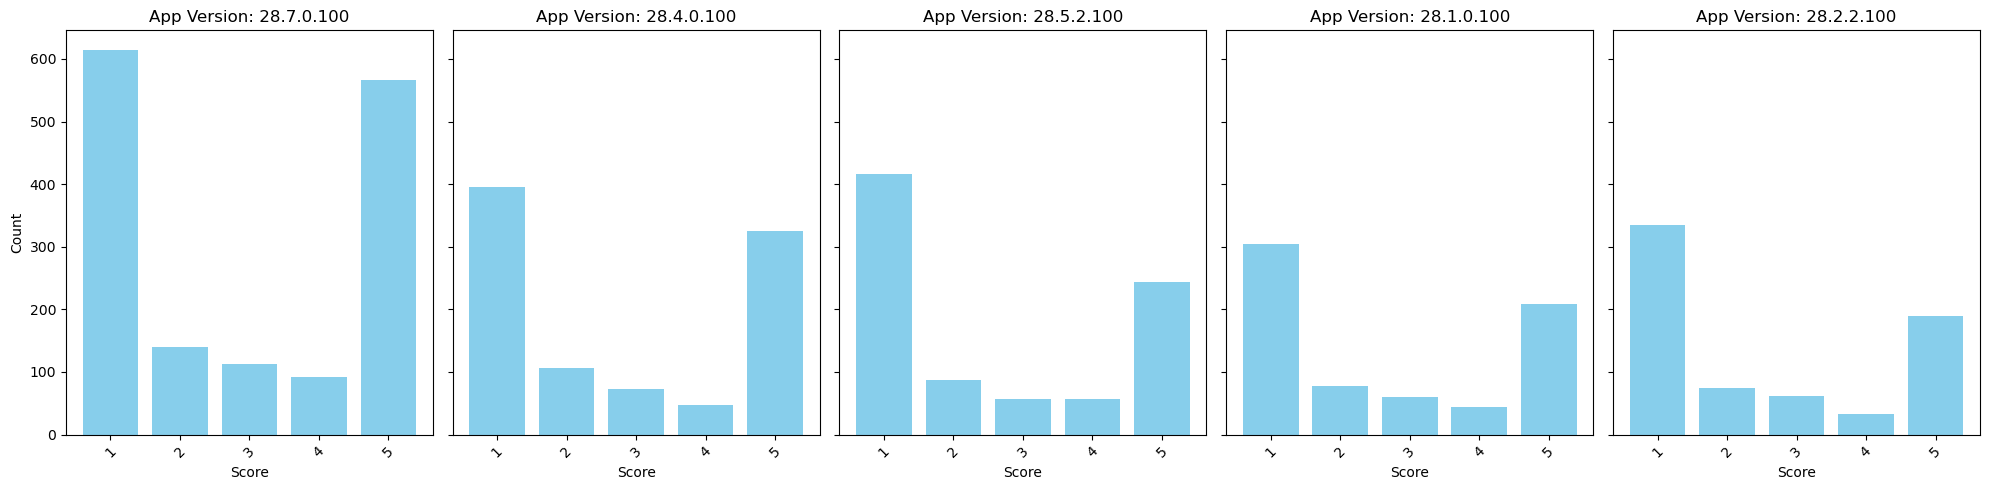

In [29]:
# Creating bar charts of the distribution of ratings for the five most frequently used versions

# Create a figure with 5 subplots in a single row
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Plot histograms for each of the top 5 app versions
for i, app_version in enumerate(top_5_app_versions):
    filtered_df = df[df['appVersion'] == app_version]
    score_counts = filtered_df['score'].value_counts().sort_index()
    
    axes[i].bar(score_counts.index, score_counts.values, color='skyblue')
    axes[i].set_title(f'App Version: {app_version}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Count' if i == 0 else "")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to ensure the plots are compact and readable
plt.tight_layout()

# Show the plot
plt.show()


##### Conclusion: The distribution of ratings for the five most frequently cited versions matches the overall distribution of ratings

#### Analysis the dynamics of changes in the average scores of versions over time

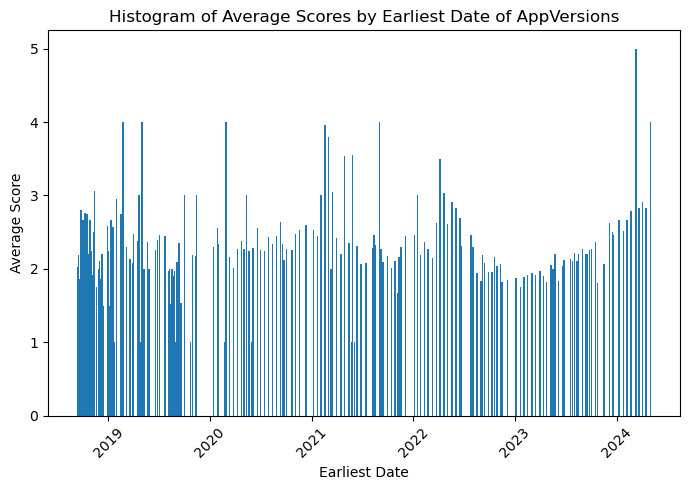

In [30]:

# Convert 'earliest_date' to datetime format
df_score_version['earliest_date'] = pd.to_datetime(df_score_version['earliest_date'])

# Aggregate the data by 'earliest_date' to find the mean score for each date
df_aggregated = df_score_version.groupby('earliest_date')['score'].mean().reset_index()

# Plotting the histogram
plt.figure(figsize=(7, 5))
plt.bar(df_aggregated['earliest_date'], df_aggregated['score'], width=5, align='center')
plt.xlabel('Earliest Date')
plt.ylabel('Average Score')
plt.title('Histogram of Average Scores by Earliest Date of AppVersions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


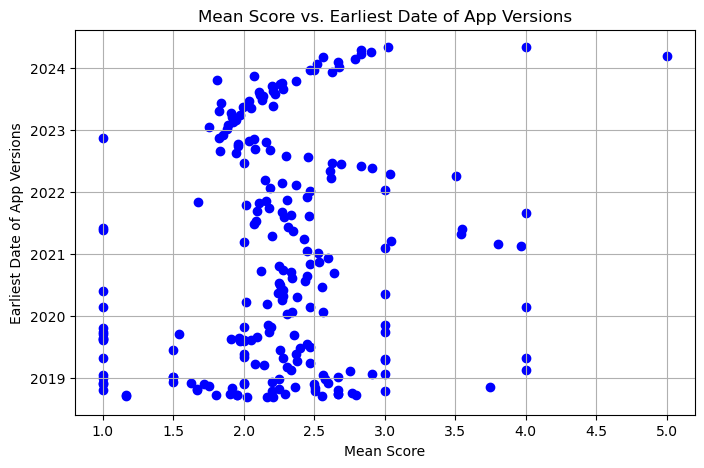

In [31]:
# Creating a scatter plot 'Mean Score vs. Earliest Date of App Versions'
plt.figure(figsize=(8, 5))
plt.scatter(df_score_version['score'], df_score_version['earliest_date'], color='blue')

# Add titles and labels
plt.title('Mean Score vs. Earliest Date of App Versions')
plt.xlabel('Mean Score')
plt.ylabel('Earliest Date of App Versions')

# Show the plot
plt.grid(True)
plt.show()

##### Conclusion: The graphs indicate a tendency of decreasing average scores across versions in 2022 and an increase throughout 2023 and 2024

### Analysis of the lexicon of reviews with the highest rating of 5 and the lowest rating of 1

In [32]:
# Importing libraries for working with lexical analysis

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure the required resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apbea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apbea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Find 15 most frequently occurring words in the 'content' column with a rating of 5

# Combine content where score is 5
content_score_5 = df[df['score']==5]['content']

# Combine strings into one
combined_content = content_score_5.str.cat(sep=' ')

# Apply lower() to the combined string
combined_content_lower = combined_content.lower()

# Tokenize words
tokens = word_tokenize(combined_content_lower)

# Remove punctuation and stop words
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Count frequency of words
word_freq = Counter(tokens)

# Get 15 most common words
top_15_words_5 = word_freq.most_common(15)

print("15 most frequently occurring words in the 'content' column with a rating of 5:")
for word, freq in top_15_words_5:
    print(f"{word}: {freq}")


15 most frequently occurring words in the 'content' column with a rating of 5:
amazon: 7996
love: 3645
app: 3603
shopping: 3087
great: 2845
easy: 2537
always: 1902
get: 1653
prime: 1595
good: 1584
service: 1563
time: 1559
delivery: 1516
everything: 1394
find: 1359


In [34]:
# Find 15 most frequently occurring words in the 'content' column with a rating of 1

# Combine content where score is 1
content_score_1 = df[df['score']==1]['content']

# Combine strings into one
combined_content = content_score_1.str.cat(sep=' ')

# Apply lower() to the combined string
combined_content_lower = combined_content.lower()

# Tokenize words
tokens = word_tokenize(combined_content_lower)

# Remove punctuation and stop words
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Count frequency of words
word_freq = Counter(tokens)

# Get 15 most common words
top_15_words_1 = word_freq.most_common(15)

print("15 most frequently occurring words in the 'content' column with a rating of 1:")
for word, freq in top_15_words_1:
    print(f"{word}: {freq}")

15 most frequently occurring words in the 'content' column with a rating of 1:
app: 16981
amazon: 13474
get: 5025
ca: 4283
time: 4227
even: 4068
prime: 3993
order: 3949
update: 3876
service: 3765
customer: 3526
use: 3487
account: 3465
items: 3227
back: 3113


In [35]:
# Find words encountered in ratings 1 and 5

# Extract just the words from the top 15 lists
top_words_5 = {word for word, freq in top_15_words_5}
top_words_1 = {word for word, freq in top_15_words_1}

# Find common words in both lists
common_words = top_words_5.intersection(top_words_1)

print("Common words in both the top 15 words of reviews with ratings of 5 and 1:")
print(common_words)

Common words in both the top 15 words of reviews with ratings of 5 and 1:
{'get', 'amazon', 'service', 'time', 'prime', 'app'}


##### Conclusion: The brand (amazon), application, time, and service are all crucial for service users. This can be used for metric development.

In [36]:
# Analysis of how often the words "AI" or "Alexa" appear in the contents

df_filtered_AI = df[df['content'].str.contains(' AI  | Alexa ')]
# Set display option to show full content of each cell
#pd.set_option('display.max_colwidth', None)
count_AI = df_filtered_AI['content'].nunique()
share_contents_AI = round(count_AI/df['content'].nunique(),4)
print (f'Count of contents with words AI or Alexa is {count_AI}, share is {share_contents_AI}')

Count of contents with words AI or Alexa is 168, share is 0.0033


##### Conclusion: Users rarely use the words "AI" or "Alexa" in their comments. Hypothesis: the use of AI is not a significant component of the service